In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mental.csv')

In [3]:
data.tail(10)

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
9990,49,Male,Employed,Remote,No,Yes,7,6.2,3,20,16,86,69.8,High
9991,43,Female,Employed,On-site,No,No,2,7.9,6,25,12,34,60.8,High
9992,18,Female,Employed,On-site,No,Yes,6,5.2,1,7,13,5,92.6,Medium
9993,59,Female,Employed,On-site,No,Yes,9,6.5,5,30,10,87,50.7,High
9994,19,Female,Employed,Hybrid,No,No,4,4.5,4,23,2,14,65.6,Medium
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High
9999,44,Male,Unemployed,Remote,No,Yes,5,6.4,7,1,16,25,100.0,Medium


In [12]:
#filter
bekerja = data[data['employment_status'] == 'Employed']
print(bekerja['mental_health_risk'].value_counts())

mental_health_risk
Medium    3448
High      1403
Low       1017
Name: count, dtype: int64


In [18]:
#boxplot
plot = ['stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']

/var/folders/42/rlys2zn13bl7_ws7grhvnvlr0000gn/T/ipykernel_16984/1314622630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bekerja, x='mental_health_risk', y=col, palette='coolwarm')
/var/folders/42/rlys2zn13bl7_ws7grhvnvlr0000gn/T/ipykernel_16984/1314622630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bekerja, x='mental_health_risk', y=col, palette='coolwarm')
/var/folders/42/rlys2zn13bl7_ws7grhvnvlr0000gn/T/ipykernel_16984/1314622630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bekerja, x='mental_health_ri

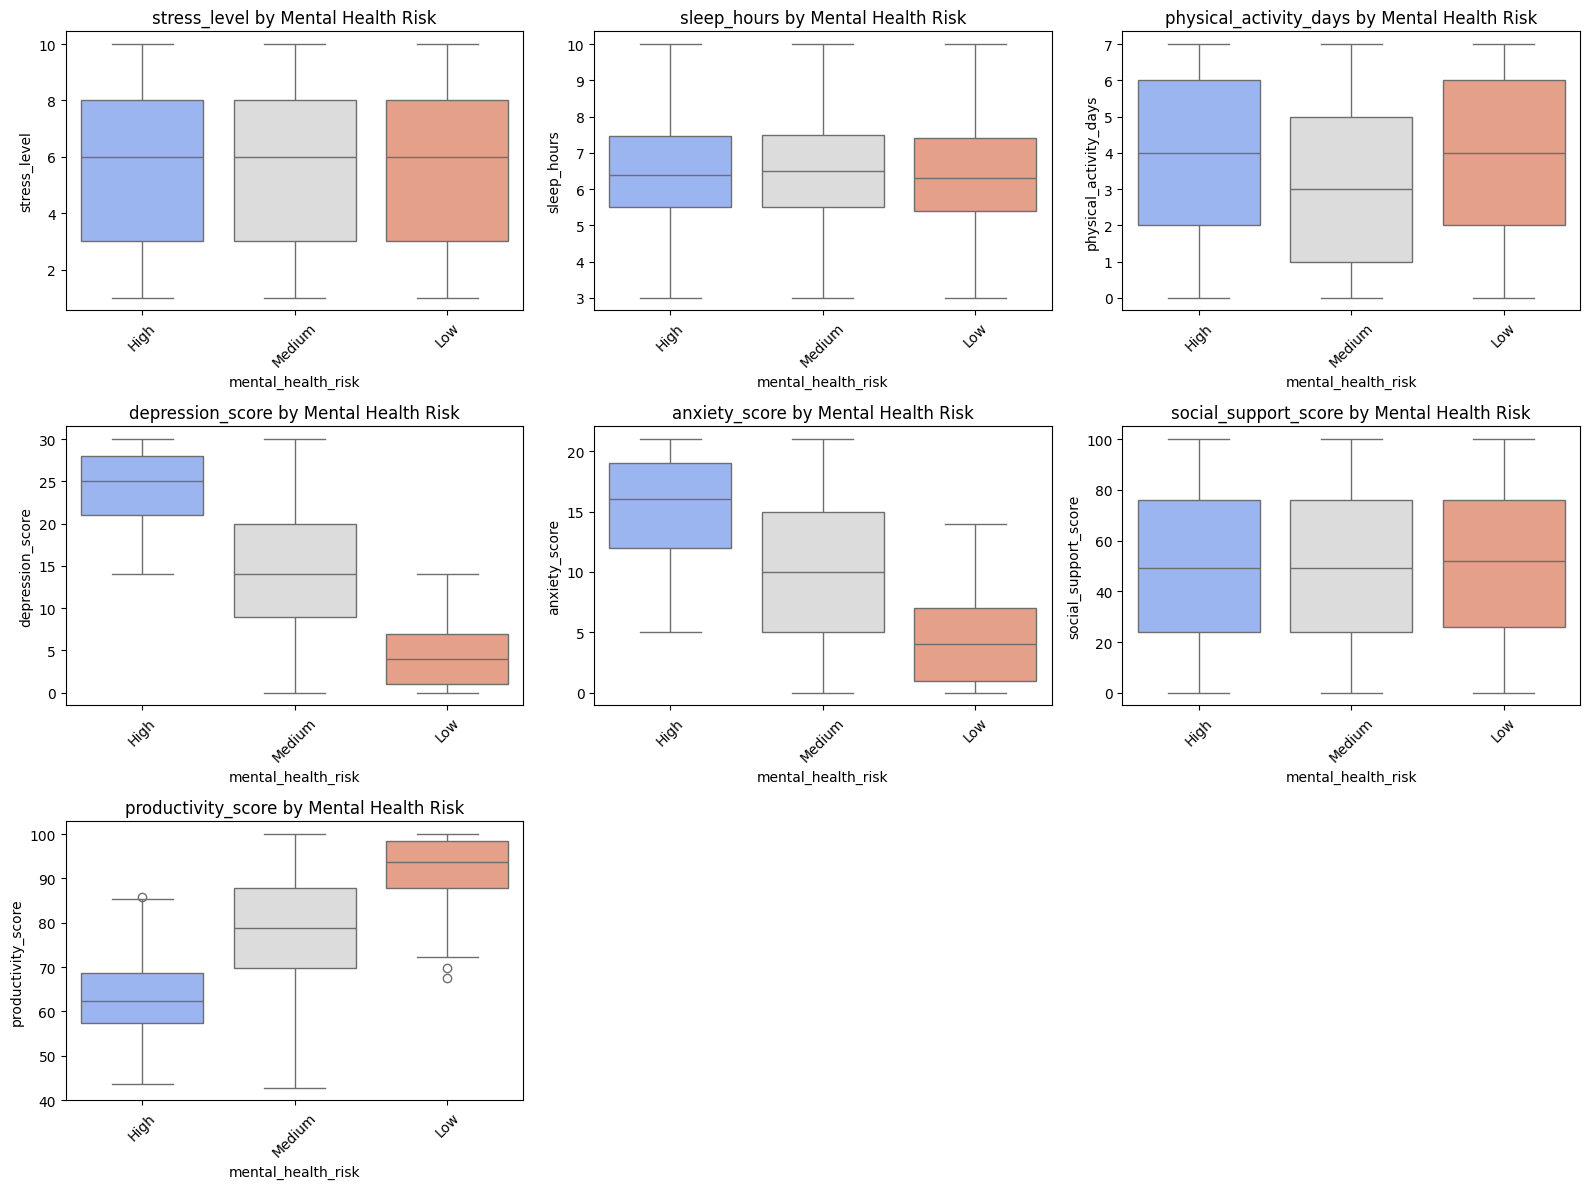

In [19]:
plt.figure(figsize = (16,12))
for i, col in enumerate(plot, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=bekerja, x='mental_health_risk', y=col, palette='coolwarm')
    plt.title(f'{col} by Mental Health Risk')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
stat = bekerja.groupby('mental_health_risk')[plot].mean().round(2)
print("Rata-rata tiap skor berdasarkan risiko kesehatan mental:")
print(stat)

Rata-rata tiap skor berdasarkan risiko kesehatan mental:
                    stress_level  sleep_hours  physical_activity_days  \
mental_health_risk                                                      
High                        5.65         6.44                    3.61   
Low                         5.57         6.39                    3.56   
Medium                      5.59         6.47                    3.46   

                    depression_score  anxiety_score  social_support_score  \
mental_health_risk                                                          
High                           24.56          15.47                 49.79   
Low                             4.68           4.53                 50.81   
Medium                         14.26          10.23                 49.97   

                    productivity_score  
mental_health_risk                      
High                             63.19  
Low                              92.49  
Medium                     

# ValueCount

In [22]:
bekerja['mental_health_risk'].value_counts()

mental_health_risk
Medium    3448
High      1403
Low       1017
Name: count, dtype: int64

In [23]:
risk_count = bekerja['mental_health_risk'].value_counts()
risk_rate = bekerja['mental_health_risk'].value_counts(normalize=True) * 100

pd.DataFrame({
    'Jumlah' : risk_count,
    'Presentase %' : risk_rate.round(2)
})

,Jumlah,Presentase %
mental_health_risk,,
Medium,3448,58.76
High,1403,23.91
Low,1017,17.33


# Mental health high risk, low risk groupby work environemnt

In [25]:
coun = bekerja.groupby(['work_environment', 'mental_health_risk']).size().unstack(fill_value=0)
print(coun)

mental_health_risk  High  Low  Medium
work_environment                     
Hybrid               296  203     668
On-site              659  524    1764
Remote               448  290    1016
